Depending in the quality of your segmentation it wil be interesting to filter your labels based on different characteristics of your dataset, like size, intensity, etc.

In this case the result that we got using stardist and a generalistic ML confidence based pixel classifier generates an oversegmentation. This issue will be easily solved setting a mena intensity threshold in order to remove the low intensity labels that represents negative signal cells.

## Setting up your requirenments

We are going to use 'numpy' to handle our arrays, 'napari' to visualize our data, 'zarr' to load and save our results.

Also, we are going to use two functions from 'scikit-image', 'measure_regionprops_table' to list the properties of our labels based on the raw data and 'util_map_array' to extract the labels that we want.

In [1]:
import numpy as np
import napari
import pandas
import zarr
import matplotlib.pyplot as plt
from skimage.measure import regionprops_table
from skimage.util import map_array


In [2]:
# load data
image = zarr.load('/media/alain/DataWS6/EHG/Explants/raw1.zarr')

# segment the image
labels = zarr.load('/media/alain/DataWS6/EHG/Explants/labels.zarr')

#intensity_labels = zarr.load('/media/alain/DataWS6/EHG/Explants/lab_intensity.zarr')

In [ ]:
viewer = napari.Viewer()

In [ ]:
viewer.add_image(image)
viewer.add_labels(labels)
#viewer.add_labels(intensity_labels)

In [3]:
props = regionprops_table(labels, intensity_image=image, properties=('label',
                                                    'area',                                                   
                                                    'equivalent_diameter_area',
                                                    'intensity_max',
                                                    'intensity_mean',
                                                    'intensity_min',
                                                    'solidity'))

In [4]:
content = pandas.DataFrame(props)
content

,label,area,equivalent_diameter_area,intensity_max,intensity_mean,intensity_min,solidity
0,5,575,10.317071,39566.0,2798.066087,185.0,0.706388
1,6,359,8.817902,5629.0,1125.013928,181.0,0.538231
2,7,310,8.396939,8985.0,1045.609677,162.0,0.761671
3,8,299,8.296422,3950.0,484.682274,134.0,0.864162
4,10,343,8.684907,9527.0,1646.737609,196.0,0.792148
...,...,...,...,...,...,...,...
40429,64475,294,8.249917,4710.0,3751.034014,3084.0,0.525939
40430,64554,131,6.301214,7082.0,5527.748092,4642.0,0.541322
40431,64564,195,7.194689,4177.0,3824.020513,3376.0,0.555556
40432,64569,292,8.231167,6326.0,5499.095890,4760.0,0.651786


In [5]:
max_vector = content['intensity_max']
mean_vector = content['intensity_mean']
min_vector = content['intensity_min']
sol_vector = content['solidity']

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

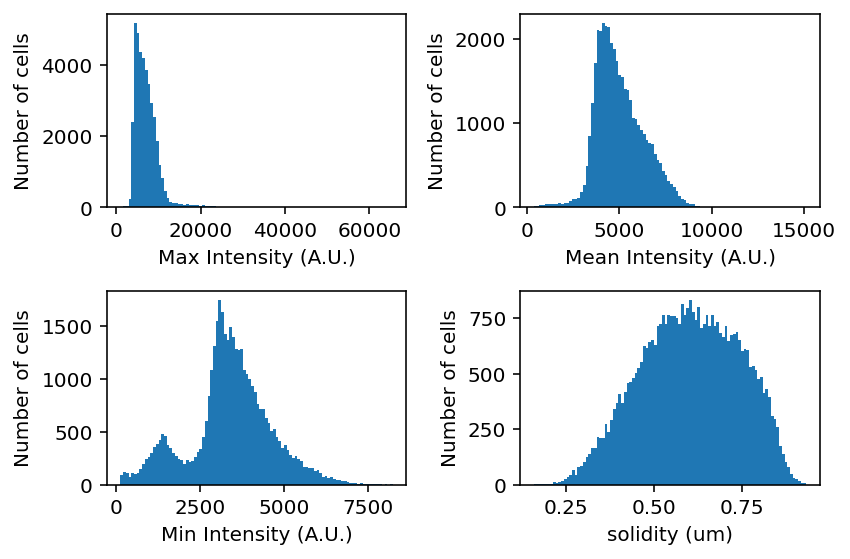

In [7]:
fig, axes = plt.subplots(2, 2)
ax = axes.ravel()

ax[0].hist(max_vector, bins=100)
ax[0].set_ylabel('Number of cells')
ax[0].set_xlabel('Max Intensity (A.U.)')

ax[1].hist(mean_vector, bins=100)
ax[1].set_ylabel('Number of cells')
ax[1].set_xlabel('Mean Intensity (A.U.)')

ax[2].hist(min_vector, bins=100)
ax[2].set_ylabel('Number of cells')
ax[2].set_xlabel('Min Intensity (A.U.)')

ax[3].hist(sol_vector, bins=100)
ax[3].set_ylabel('Number of cells')
ax[3].set_xlabel('solidity (um)') 

fig.tight_layout()

In [9]:
intensity_labels = map_array(
    labels,
    label_ids := np.asarray(content['label']),
    label_ids * np.asarray(content['intensity_mean'] > 4000),
)

In [ ]:
viewer.add_labels(intensity_labels)

In [10]:
zarr.convenience.save('/media/alain/DataWS6/EHG/Explants/lab_intensity.zarr', intensity_labels)